# Text Classification - IMDB Reviews


IMDB movies reviews classification using Bag of Words and Random Forest.

### Importing libraries

In [15]:

import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import joblib
from datetime import datetime

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

### Preprocessing Data

In [16]:
# Preprocessing

df = pd.read_csv('IMDB Dataset.csv')

#normalizing to lowercase letters
df['review'] = df['review'].str.lower()

#removing hyperlinks
df['review'] = df['review'].str.replace('[^\w\s]','')

#tokenization 
df['review_tok'] = df['review'].str.split()

#removing stopwords
stop_words = set(stopwords.words('english'))
df['review_stop'] = df['review_tok'].apply(lambda x: [item for item in x if item not in stop_words])
  
#Stemming - Porter Stemmer
porter_stemmer = PorterStemmer()
df['review_PS'] = df['review_stop'].apply(lambda x: [porter_stemmer.stem(y) for y in x])


preprocessing data...
preprocessing done!


## Creating representation using Bag of Words - TF-IDF

In [17]:
X = df['review_PS'].map(' '.join)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_features = 500000)

# Fit the model
tf_transformer = tf.fit(X)

# Dump the file
pickle.dump(tf_transformer, open("tfidf1_v3.pkl", "wb"))

X_tf = tf_transformer.fit_transform(X)

transforming words to numbers...
BoW done!


### Training model using Random Forest algorithm

In [4]:
y = df['sentiment']

# split train/test

X_train,X_test,y_train,y_test = train_test_split(X_tf, y, test_size=0.2, random_state=0)

# train test classification

classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

splitting base...
training model...
training done!


### Testing the model and analyzing the results

In [18]:
print('printing scores...')
# predict
y_pred = classifier.predict(X_test)
y_score = classifier.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred))
print("Accuracy score:")
print(accuracy_score(y_test, y_pred))
print("AUC score:")
print(roc_auc_score(y_test, y_score))

#Accuracy = TP+TN/TP+FP+FN+TN
#Precision = TP/TP+FP
#Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

printing scores...
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      5035
    positive       0.85      0.86      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy score:
0.8572
AUC score:
0.9335591443980755


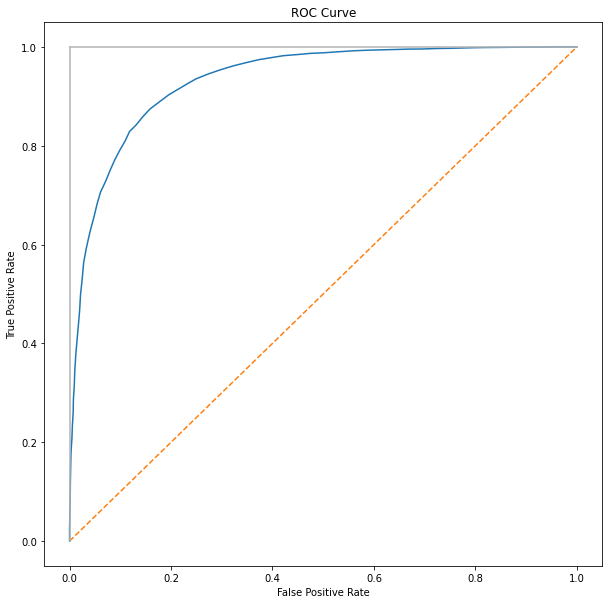

In [19]:
#Ploting ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_score, pos_label= 'positive')
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Saving Model

In [ ]:
joblib.dump(classifier, "./model_imdb_classifier_.joblib")